In [2]:
# calculate inception score for cifar-10 in Keras
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray

# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)

# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# enumerate splits of images/predictions
	scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve images
		ix_start, ix_end = i * n_part, (i+1) * n_part
		subset = images[ix_start:ix_end]
		# convert from uint8 to float32
		subset = subset.astype('float32')
		# scale images to the required size
		subset = scale_images(subset, (299,299,3))
		# pre-process images, scale to [-1,1]
		subset = preprocess_input(subset)
		# predict p(y|x)
		p_yx = model.predict(subset)
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std

# load cifar10 images
(images, _), (_, _) = cifar10.load_data()
# shuffle images
shuffle(images)
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print('score', is_avg, is_std)

loaded (50000, 32, 32, 3)
157/157 [==============================] - 37s 233ms/step
score 2.043047 0.009300497


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

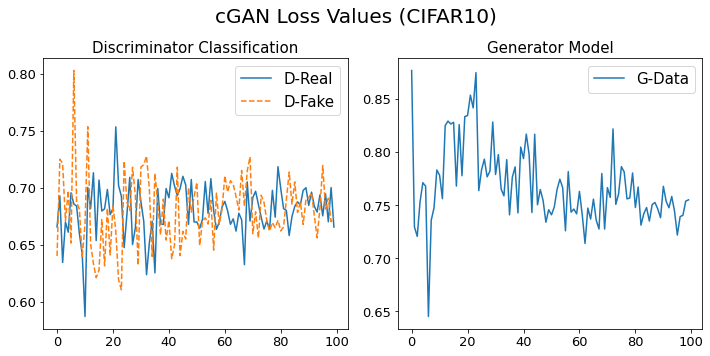

In [33]:
dataset_name = 'cifar10'

hash = pd.read_csv(f'{dataset_name}.csv')
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
FONTSIZE = 20

d_loss1 = hash.d_loss1
d_loss2 = hash.d_loss2
g_loss = hash.g_loss

axs[0].plot(d_loss1, label='D-Real', linestyle='-')
axs[0].plot(d_loss2, label='D-Fake', linestyle='--')
axs[0].set_title('Discriminator Classification', fontsize=FONTSIZE-5)
axs[0].tick_params(axis='both', which='major', labelsize=FONTSIZE-7)
axs[0].tick_params(axis='both', which='minor', labelsize=FONTSIZE-7)
axs[0].legend(loc='upper right', fontsize=FONTSIZE-5)

axs[1].plot(g_loss, label='G-Data', linestyle='-')
axs[1].set_title('Generator Model', fontsize=FONTSIZE-5)
axs[1].tick_params(axis='both', which='major', labelsize=FONTSIZE-7)
axs[1].tick_params(axis='both', which='minor', labelsize=FONTSIZE-7)
axs[1].legend(loc='upper right', fontsize=FONTSIZE-5)

fig.suptitle(f'cGAN Loss Values ({dataset_name.upper()})', fontsize=FONTSIZE)
fig.tight_layout()
plt.savefig(f'{dataset_name}-loss-values.png', bbox_inches='tight')
plt.show()
plt.close()

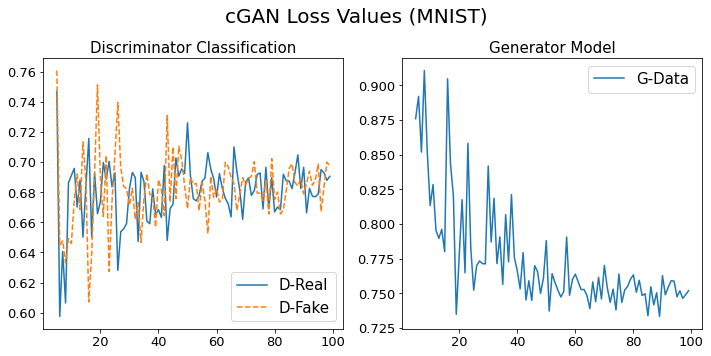

In [27]:
dataset_name = 'mnist'

hash = pd.read_csv(f'{dataset_name}.csv')
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
FONTSIZE = 20

start = 5

d_loss1 = hash.d_loss1[start:]
d_loss2 = hash.d_loss2[start:]
g_loss = hash.g_loss[start:]

axs[0].plot(d_loss1, label='D-Real', linestyle='-')
axs[0].plot(d_loss2, label='D-Fake', linestyle='--')
axs[0].set_title('Discriminator Classification', fontsize=FONTSIZE-5)
axs[0].tick_params(axis='both', which='major', labelsize=FONTSIZE-7)
axs[0].tick_params(axis='both', which='minor', labelsize=FONTSIZE-7)
axs[0].legend(loc='lower right', fontsize=FONTSIZE-5)

axs[1].plot(g_loss, label='G-Data', linestyle='-')
axs[1].set_title('Generator Model', fontsize=FONTSIZE-5)
axs[1].tick_params(axis='both', which='major', labelsize=FONTSIZE-7)
axs[1].tick_params(axis='both', which='minor', labelsize=FONTSIZE-7)
axs[1].legend(loc='upper right', fontsize=FONTSIZE-5)

fig.suptitle(f'cGAN Loss Values ({dataset_name.upper()})', fontsize=FONTSIZE)
fig.tight_layout()
plt.savefig(f'{dataset_name}-loss-values.png', bbox_inches='tight')
plt.show()
plt.close()